<a href="https://colab.research.google.com/github/Sciform/sciform-hwz-rl-and-qml/blob/main/quantum_computing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer

In [16]:
!pip list | grep qiskit

qiskit                                2.0.2
qiskit-aer                            0.17.1


# 1. Basic building blocks
## 1.1. Quantum circuits

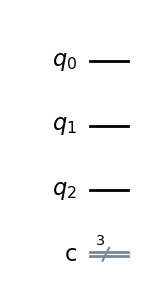

In [17]:
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw(output='mpl')  # returns a drawing of the circuit

## 1.2. Quantum Measurement


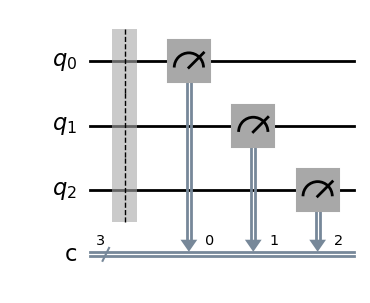

In [18]:
qc = QuantumCircuit(3, 3)
qc.barrier()
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

# 1.3. Perform a quantum computation for a given quantum circuit

In [45]:
def perform_quantum_computation(qc: QuantumCircuit, num_of_shots: int=1024):

  from qiskit_aer import AerSimulator
  from qiskit import transpile

  # Create simulator
  sim = AerSimulator()

  # Transpile and run
  # transpile() optimizes and converts a quantum circuit to be compatible
  # with a specific backend (like a simulator or real quantum hardware).
  # It adapts the circuit to the gate set and topology of the backend.
  transpiled_circuit = transpile(qc, sim)
  result = sim.run(transpiled_circuit, shots=num_of_shots).result()

  # Get counts
  counts = result.get_counts()
  print(counts)


perform_quantum_computation(qc)

{'0': 517, '1': 507}


## 1.4.Encoding an input with the NOT-gate


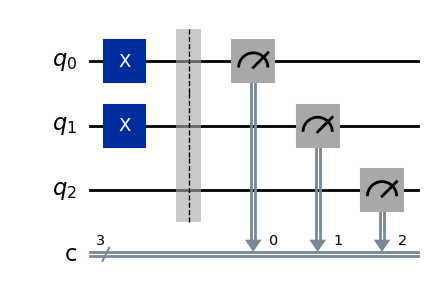

In [20]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x(0)  # Perform X-gates on qubits 0 & 1
qc.x(1)  # Perform X-gates on qubits 0 & 1
qc.barrier()
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')    # retu

In [21]:
# perform computation
perform_quantum_computation(qc)

{'011': 1024}


# 2. Superposition

In [46]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(1, 1)

# Step 2: Apply Hadamard gate to qubit 0 to create superposition
qc.h(0)

# Step 4: Measure both qubits
qc.measure([0], [0])

In [51]:
# perform computation
perform_quantum_computation(qc, num_of_shots=2048)

{'0': 1026, '1': 1022}


# 3. Entanglement
## 3.1. The controlled NOT gate (CNOT-gate)


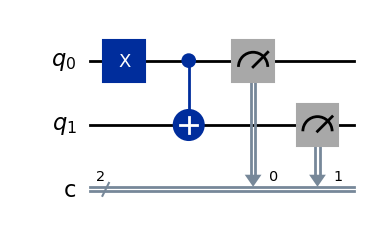

In [22]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
qc.draw(output='mpl')     # display a drawing of the circuit

In [13]:
perform_quantum_computation(qc)

{'011': 1024}


## 3.2. Entangle Bell state

In [36]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# qc.x(0)

# Step 2: Apply Hadamard gate to qubit 0 to create superposition
qc.h(0)

# Step 3: Apply CNOT gate to entangle qubit 0 with qubit 1
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

In [52]:
# perform computation
perform_quantum_computation(qc)

{'0': 539, '1': 485}


# 4. Interference

In [53]:
qc = QuantumCircuit(1, 1)

# Create superposition
qc.h(0)
# Apply H again to cause interference
qc.h(0)
qc.measure(0, 0)

In [54]:
# perform computation
perform_quantum_computation(qc)

{'0': 1024}


# Creating a half adder circuit with a Toffoli-gate (CCNOT-gate)



7.svg



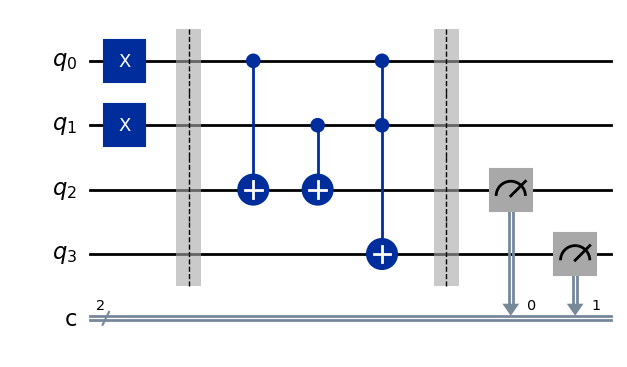

In [31]:
half_adder_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
half_adder_qc.x(0)
half_adder_qc.x(1)
half_adder_qc.barrier()

# Next, it should carry out the adder circuit we created
half_adder_qc.cx(0,2)
half_adder_qc.cx(1,2)
half_adder_qc.ccx(0,1,3)
half_adder_qc.barrier()

# Finally, we will measure the bottom two qubits to extract the output
half_adder_qc.measure(2,0)
half_adder_qc.measure(3,1)
half_adder_qc.draw(output='mpl')

In [32]:
perform_quantum_computation(half_adder_qc)

{'10': 1024}
